In [1]:
import numpy as np

import matplotlib.pyplot as plt

### 加载数据

In [3]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.3,random_state=666)

### 分割数据

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

### 可视化

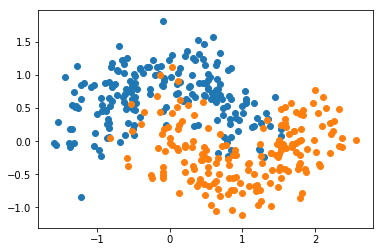

In [8]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1])
plt.show()

### 3种不同的模型在默认参数下的效果

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

log_reg.score(X_test,y_test)

0.872

In [17]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)

svc.score(X_test,y_test)

0.89600000000000002

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

dtc.score(X_test,y_test)

0.872

### 集成学习

In [36]:
yp1 = log_reg.predict(X_test)
yp2 = svc.predict(X_test)
yp3 = dtc.predict(X_test)

### hard算法

In [37]:
ypf  = np.array(((yp1+yp2+yp3)>=2),dtype=int)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,ypf)

0.88800000000000001

### sklearn中的集成学习

In [42]:
from sklearn.ensemble import VotingClassifier

#### 少数服从多数算法

In [48]:
vc = VotingClassifier(estimators=[
    ("log_reg",LogisticRegression()),
    ('svc',SVC()),
    ("tree",DecisionTreeClassifier(random_state=666))
],voting="hard")

In [49]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svc', S...       min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [50]:
vc.score(X_test,y_test)

0.88800000000000001

### soft voting(根据权重进行投票)

In [60]:
vc = VotingClassifier(estimators=[
    ("log_reg",LogisticRegression()),
    ('svc',SVC(probability=True)),
    ("tree",DecisionTreeClassifier(random_state=666))
],voting="soft")

In [61]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svc', S...       min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [62]:
vc.score(X_test,y_test)

0.89600000000000002